<a href="https://colab.research.google.com/github/vanessafeldmann86-alt/Aerobic-mesophilic-spore-forming-bacteria/blob/main/pH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kruskal
import scikit_posthocs as sp

# Seus dados
valores_PD = [3.72, 4.81, 4.12, 3.76, 5.48, 3.93, 3.99, 5.48, 4.01, 5.04, 5.22, 3.71, 5.04, 5.35, 4.10, 3.92, 3.41, 4.84, 4.73, 5.00, 5.95, 5.28, 4.42, 4.0, 5.33, 6.68, 5.67, 3.71, 4.04, 5.09]
valores_PA = [3.72, 3.57, 5.21, 4.97, 5.11, 5.10, 3.49, 4.97, 4.98, 5.2, 3.73, 4.39, 4.49, 5.45, 3.66, 4.69, 5.21, 3.84, 5.03, 4.02, 3.42, 5.86, 3.47, 3.29, 5.02, 5.24, 3.51, 3.92, 4.22, 5.12]
valores_FM = [5.20, 5.47, 4.78, 5.47, 4.70, 4.74, 4.12, 4.87, 6.52, 5.46, 4.95, 4.81, 6.01, 5.43, 4.25, 4.84, 5.87, 4.67, 4.81, 5.44, 6.14, 5.87, 5.02, 4.93, 6.66, 5.60, 4.36, 6.12, 6.34, 6.39]

# Criando DataFrame
df = pd.DataFrame({
    'Amostra': ['PD']*30 + ['PA']*30 + ['FM']*30,
    'pH': valores_PD + valores_PA + valores_FM
})

# Normalidade (Shapiro-Wilk)
print("Teste de Normalidade (Shapiro-Wilk):")
for grupo in df['Amostra'].unique():
    stat, p = shapiro(df[df['Amostra'] == grupo]['pH'])
    print(f"{grupo}: estatística={stat:.4f}, p-valor={p:.4f}")

# Kruskal-Wallis
grupos = [df[df['Amostra'] == g]['pH'] for g in ['PD', 'PA', 'FM']]
stat, p = kruskal(*grupos)
print(f"\nKruskal-Wallis: estatística={stat:.4f}, p-valor={p:.4f}")
if p < 0.05:
    print("→ Diferença significativa entre os grupos.")
    dunn = sp.posthoc_dunn(df, val_col='pH', group_col='Amostra', p_adjust='bonferroni')
    print("\nTeste de Dunn (post-hoc):")
    print(dunn)
else:
    print("→ Não há diferença significativa.")

# Resumo estatístico
summary = df.groupby('Amostra').agg(
    Mediana=('pH', 'median'),
    Q1=('pH', lambda x: x.quantile(0.25)),
    Q3=('pH', lambda x: x.quantile(0.75))
).round(2)

print("\nResumo Estatístico (pH):")
print(summary)


ModuleNotFoundError: No module named 'scikit_posthocs'

Resumo estatístico (pH):
         Mediana    Q1    Q3
Amostra                     
FM          5.32  4.81  5.87
PA          4.59  3.72  5.11
PD          4.77  3.99  5.26


<ipython-input-2-1576b29f34fb>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Amostra', y='pH', data=df, showfliers=True, palette='Set2')


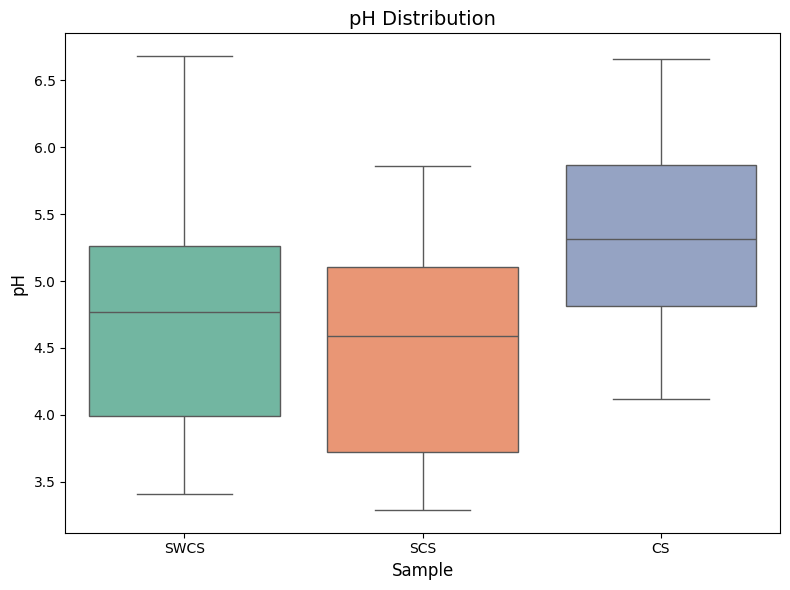

In [ ]:
import pandas as pd

# Dados de pH
valores_PD = [3.72, 4.81, 4.12, 3.76, 5.48, 3.93, 3.99, 5.48, 4.01, 5.04, 5.22, 3.71, 5.04, 5.35, 4.10, 3.92, 3.41, 4.84, 4.73, 5.00, 5.95, 5.28, 4.42, 4.0, 5.33, 6.68, 5.67, 3.71, 4.04, 5.09]
valores_PA = [3.72, 3.57, 5.21, 4.97, 5.11, 5.10, 3.49, 4.97, 4.98, 5.2, 3.73, 4.39, 4.49, 5.45, 3.66, 4.69, 5.21, 3.84, 5.03, 4.02, 3.42, 5.86, 3.47, 3.29, 5.02, 5.24, 3.51, 3.92, 4.22, 5.12]
valores_FM = [5.20, 5.47, 4.78, 5.47, 4.70, 4.74, 4.12, 4.87, 6.52, 5.46, 4.95, 4.81, 6.01, 5.43, 4.25, 4.84, 5.87, 4.67, 4.81, 5.44, 6.14, 5.87, 5.02, 4.93, 6.66, 5.60, 4.36, 6.12, 6.34, 6.39]

# Criando DataFrame
df = pd.DataFrame({
    'Amostra': ['PD']*30 + ['PA']*30 + ['FM']*30,
    'pH': valores_PD + valores_PA + valores_FM
})

# Calculando mediana e quartis
summary = df.groupby('Amostra')['pH'].agg([
    ('Mediana', 'median'),
    ('Q1', lambda x: x.quantile(0.25)),
    ('Q3', lambda x: x.quantile(0.75))
]).round(2)

print("Resumo estatístico (pH):")
print(summary)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dados de pH para cada tipo de amostra
valores_SWCS = [3.72, 4.81, 4.12, 3.76, 5.48, 3.93, 3.99, 5.48, 4.01, 5.04, 5.22, 3.71, 5.04, 5.35, 4.10, 3.92, 3.41, 4.84, 4.73, 5.00, 5.95, 5.28, 4.42, 4.0, 5.33, 6.68, 5.67, 3.71, 4.04, 5.09]
valores_SCS = [3.72, 3.57, 5.21, 4.97, 5.11, 5.10, 3.49, 4.97, 4.98, 5.2, 3.73, 4.39, 4.49, 5.45, 3.66, 4.69, 5.21, 3.84, 5.03, 4.02, 3.42, 5.86, 3.47, 3.29, 5.02, 5.24, 3.51, 3.92, 4.22, 5.12]
valores_CS = [5.20, 5.47, 4.78, 5.47, 4.70, 4.74, 4.12, 4.87, 6.52, 5.46, 4.95, 4.81, 6.01, 5.43, 4.25, 4.84, 5.87, 4.67, 4.81, 5.44, 6.14, 5.87, 5.02, 4.93, 6.66, 5.60, 4.36, 6.12, 6.34, 6.39]

# Criando o DataFrame
dados = {
    'Amostra': ['SWCS']*30 + ['SCS']*30 + ['CS']*30,
    'pH': valores_SWCS + valores_SCS + valores_CS
}
df = pd.DataFrame(dados)

# Criando o boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Amostra', y='pH', data=df, showfliers=True, palette='Set2')

# Adicionando título e rótulos
plt.title('pH Distribution', fontsize=14)
plt.xlabel('Sample', fontsize=12)
plt.ylabel('pH', fontsize=12)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

# Nova seção

In [ ]:
from google.colab import drive
drive.mount('/content/drive')